grupowanie hierarchiczne - podział zbioru na hierarchiczne grupy, spprawdza wszystkie możliwe odległości, łączy najbliższe sobie punkty w grupy a następnie stopniowo łączy grupy w większe aż uzyskuje jedną dużą grupę, która zawiera wszytkie punkty (wszystkie pozostałe grupy) 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv')

In [13]:
#1. zrób one-hot encoding na kolumnie Genere
#2. dodaj do df nową kolumnę "is_male"
#3. usuń niepotrzebne kolumny z df

In [14]:
temp = pd.get_dummies(df.Genre, prefix = 'is')
temp

,is_Female,is_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [15]:
df['is male'] = temp['is_Male']

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),is male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [16]:
df = df.drop(['Genre','CustomerID'], axis = 1)

df

,Age,Annual Income (k$),Spending Score (1-100),is male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


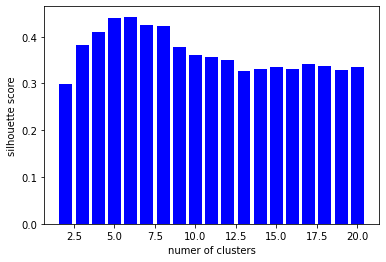

In [17]:
#Teraz policz silhouette_score.

from sklearn.metrics import silhouette_score

def get_agglomerative_clustering(data, k):
    agg_cluster = AgglomerativeClustering(n_clusters=k)
    model = agg_cluster.fit(data)
    return silhouette_score(data, model.labels_, metric='euclidean')

results = []
k_list = list(range(2,21))

for k in k_list:
    results.append(get_agglomerative_clustering(df, k))

plt.bar(k_list, results, color='b')
plt.xlabel('numer of clusters')
plt.ylabel('silhouette score')
plt.show()

zaczynamy wyświetlanie od największego klastra - i potem tak to sobie dzieli na te mniejsze 

In [19]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
model = agg_cluster.fit(df)
print(silhouette_score(df, model.labels_, metric='euclidean'))


0.43997527212476695


In [20]:
agg_cluster = AgglomerativeClustering(n_clusters=6)
model = agg_cluster.fit(df)
print(silhouette_score(df, model.labels_, metric='euclidean'))


0.4428008535928764


ta różnica jest niewielka, nie można jednoznacznie stwierdzić, która liczba klastrów jest lepsza - warto może zatem wrócić jednak do k-means, który wyraźniej wskazywał najlepszą liczbę klastrów
(gdy żaden algorytm nie wskazuje wyraźnie dobrej odpowiedzi - może to oznaczać, że zbioru zwyczajnie nie da się w ten sposób podzielić) 